# Study on The Insights Data Set


`Imports`


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #needed for creating a model 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
df = pd.read_csv("Insights.csv")
print(df.columns.values.tolist())

['Date', 'HS Code', 'Product', 'Specific Product', 'Port of Origin', 'Country of Destination', 'Port of Destination', 'Value(USD)(CP)', 'Std Qty', 'Std Unit', 'Std Unit Price(USD)(SP)', 'Qty', 'Unit', 'Value In FC(Cost)', 'Unit Rate In FC', 'Unit Rate Currency', 'Value(INR)', 'Shipment Mode', 'Invoice Value INR', 'Exachange Rate', 'Unit Rate in Rs', 'Profit in Rs', 'Profit %']


In [14]:
p_of_d = df['Port of Destination']
qty = df['Qty']

In [26]:
dict={}
list_of_yes_and_no=[]
list_of_Value_INR=[]
for i in range(len(df)):
    if str(df['Port of Destination'][i])=='Hamburg':
        if float(df['Qty'][i]) >= 100:
            list_of_yes_and_no.append(1)
        else:
            list_of_yes_and_no.append(0)
        list_of_Value_INR.append(df['Value(INR)'][i])
#     dict['hamburg']=

# print(list_of_yes_and_no)


print(len(list_of_yes_and_no),
      len(list_of_Value_INR))

487 487


In [20]:
y= pd.DataFrame(list_of_yes_and_no)
x= pd.DataFrame(list_of_Value_INR)
# print(y.head())
# print("X HEAD************")
# print(x.head())
 # we dont need this in independant data , so dropping 
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.33,random_state=1) 
X_train.fillna(X_train.mean(),inplace=True) #this will replace all NAN values by their mean. 
Y_train.fillna(Y_train.mean(),inplace=True) #this will replace all NAN values by their mean.   
# print(X_train.shape) 
# print(X_test.shape) 
# print(Y_train.shape) 
# print(Y_test.shape) 
logis=LogisticRegression(solver='liblinear', C=10.0, random_state=0)

logis.fit(X_train,Y_train) 
predictions = logis.predict(X_test) 
print(classification_report(Y_test,predictions)) 
 
print(accuracy_score(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.63      1.00      0.78       102

    accuracy                           0.63       161
   macro avg       0.32      0.50      0.39       161
weighted avg       0.40      0.63      0.49       161

0.6335403726708074


/Users/reubencoutinho/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
/Users/reubencoutinho/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/reubencoutinho/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
logis.score(X_train,Y_train) 

0.6134969325153374

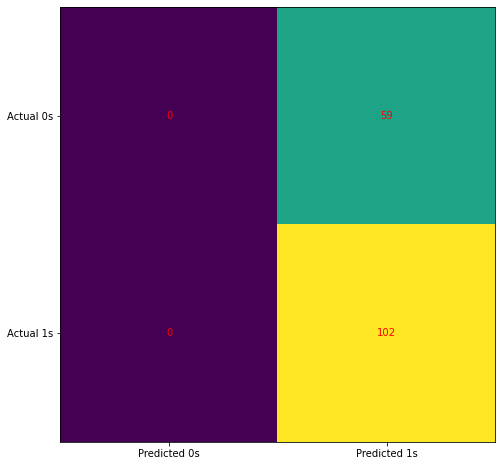

In [27]:
cm = confusion_matrix(Y_test,predictions)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()